# Исследование объявлений о продаже квартир

# Описание проекта

По данным сервиса Яндекс Недвижимость об объявлениях о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет необходимо определить рыночную стоимость объектов недвижимости.<br> 
Задача:<br>
провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.<br> 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

<b> Описание данных</b><br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
balcony — число балконов<br>
ceiling_height — высота потолков (м)<br>
cityCenters_nearest — расстояние до центра города (м)<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
first_day_exposition — дата публикации<br>
floor — этаж<br>
floors_total — всего этажей в доме<br>
is_apartment — апартаменты (булев тип)<br>
kitchen_area — площадь кухни в квадратных метрах (м²)<br>
last_price — цена на момент снятия с публикации<br>
living_area — жилая площадь в квадратных метрах (м²)<br>
locality_name — название населённого пункта<br>
open_plan — свободная планировка (булев тип)<br>
parks_around3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
rooms — число комнат<br>
studio — квартира-студия (булев тип)<br>
total_area — общая площадь квартиры в квадратных метрах (м²)<br>
total_images — число фотографий квартиры в объявлении<br>

### Загрузка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Загружаем данные из csv-файла в датафрейм выводим на экран первые 5 строк
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#выводим на экран информацию о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В файле содержится 23699 строк В столбцах 5, 7, 9, 12-21 имеются пропущенные значения.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

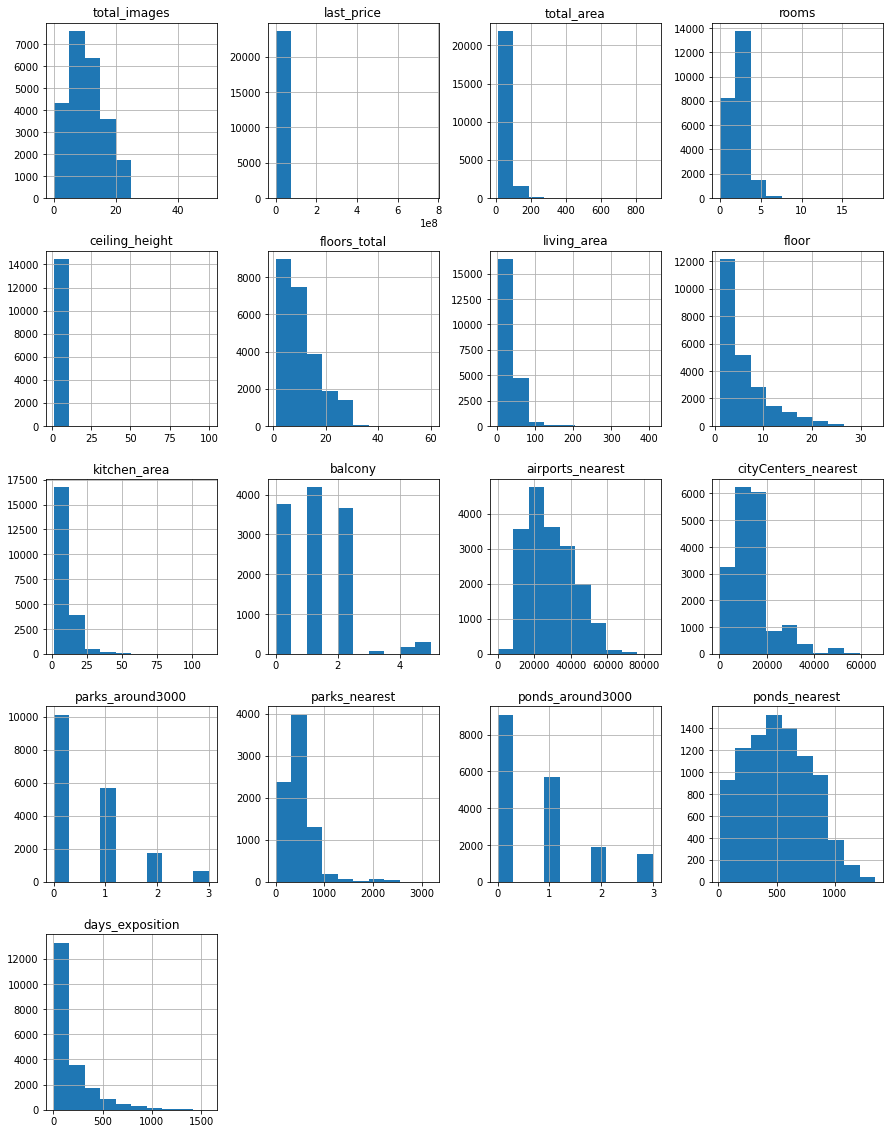

In [5]:
#Построим гистограмму для всех числовых столбцов таблицы на одном графике
df.hist(figsize=(15, 20))

По гистограммам можно сказать о наличии явных выбросов в столбцах last_price, total_area, living_area, kitchen_area, rooms, ceiling_height.

### Предобработка данных

#### Работа с пропусками в данных

In [6]:
#Выведем количество пропущенных значений в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Высота потолков (ceiling_height) не заполнена в трети случаев. Это достаточно большая часть данных. Можно заполнить средними или медиаными значениями.<br>
Данные об общем количестве этажей(floors_total) отсутствуют лишь у 86 объектов, что состаляет 0,36% от всех данных. Такие строки можно удалить.<br>
Название населенного пунка не указано в 49 случаях (0,21% от общего количества данных). Пропуски этих значений скорее всего не повлияют на результат анализа. Их можно удалить.<br>
Жилая площадь квартиры (living_area) и площадь кухни (kitchen_area) пропущены в 8% и 9% случаев, соответственно.
Пропущенные значения числа балконов заменим на 0 (скорее всего их нет, раз собственник их не указал).
Является ли квартира аппартаментами не указано в 88% объявлений. Скорее всего собственник не указывал этот параметр, если квартира не является аппартаментами. Пропущенные значния заменим на False.

Расстояние до центра, аэропорта и других объектов, а так же количество парков и водоёмов— эти данные автоматически получены из геосервисов и заполняются без участия пользователя. 
Бросается в глаза одинаковое количество пропущенных значений в количестве парков и водоемов в радиусе 3 км. Необходимо проверить, возможно это касается одних и тех же объектов. В этом случае можно предположить, что их там просто нет. Тогда сможем заменить пропущенные значения на 0. Так же можно предположить, что расстояние для ближайшего водоема/парка не указано из-за их отсутствия. 

In [7]:
#Проверим, что количество парков и водоемов пропущено у одних и тех же объектов
len(df.loc[(df['parks_around3000'].isna()==True)&(df['ponds_around3000'].isna()==True)])

5518

Количество парков и водоемов не указано в одних и тех же объявлениях. Скорее всего их там просто нет. Заменим пропущенные значения на 0.

In [8]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [9]:
#заменим пропущенные значения в данных о числе балконов на 0
df['balcony']=df['balcony'].fillna(0)
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [10]:
#заменим пропущенные значения в данных об аппартаментах на False
df.loc[df['is_apartment'].isna(),'is_apartment'] = False
df['is_apartment'].unique()

array([False, True], dtype=object)

In [11]:
#удалим строки с незаполненным населенным пунктом и общим количеством этажей
df = df.dropna(subset=['locality_name','floors_total'])

In [12]:
#Посмотрим статистику по данным о высоте потолков
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
df.loc[df['ceiling_height']>3,'ceiling_height'].sort_values(ascending=False).head(20)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
5807      27.0
4876      27.0
17857     27.0
22938     27.0
10773     27.0
21824     27.0
5246      27.0
5669      26.0
18545     25.0
355       25.0
6246      25.0
14382     25.0
9379      25.0
11285     25.0
4643      25.0
Name: ceiling_height, dtype: float64

Данные о высоте потолка пропущены в трети объявлений. Пропущенные данные можно заменить на средние значения. Минимальное и максимальное значения говорят о наличии аномальных значений в столбце. Некоторые данные содержат значения, в 10 раз и более превышающие стандартную высоту. Скорее всего, указана не верная размерность. Заменим эти значения, поделив их на 10.

In [14]:
df.loc[df['ceiling_height']>=20,'ceiling_height']=df.loc[df['ceiling_height']>20,'ceiling_height']/10
df['ceiling_height'].describe()

count    14480.000000
mean         2.729376
std          0.319732
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

In [15]:
#заполним пустые значения в данных по высоте потолков медианным значением
df.loc[df['ceiling_height'].isna(),'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'].describe()

count    23565.000000
mean         2.698774
std          0.253589
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [16]:
#удалим строки со значениями высоты потолка менее 2 и более 6 м.
df = df.query('6>=ceiling_height>=2')
df['ceiling_height'].describe()

count    23555.000000
mean         2.696925
std          0.221417
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Чтобы заполнить пустые значения в данных о жилой площади и площади кухни рассчитаем их долю от общей площади по имеющимя данным. Поскольку данный парамет зависит от количества комнат в квартире (например, размер кухни в 1 и 2 комнатной квартирах может быть один и тот же при разной общей площади квартир).

In [17]:
#рассчитаем среднюю долю, которую занимает жилая площадь в общей площади квартиры для каждого вида квартир(по количеству комнат).
df['living_part'] = (df['living_area']/df['total_area'])
living_part_mean = df.groupby('rooms', as_index=False).agg({'living_part':'mean'})
living_part_mean   

,rooms,living_part
0,0,0.685467
1,1,0.486098
2,2,0.579531
3,3,0.625521
4,4,0.646850
5,5,0.641377
6,6,0.670108
7,7,0.657981
8,8,0.667001
9,9,0.612299


In [18]:
#заменим пропущенные значения в соответствии с расчитанными значениями и проверим, остались ли незаполненные данные по столбцу
for i in df.loc[df['living_area'].isna()==True,'rooms'].unique():
    try:
        living_part_meani=living_part_mean.loc[i][1]
        df.loc[(df['rooms']==i)&(df['living_area'].isna()==True),'living_area'] = df.loc[(df['living_area'].isna()==True)&(df['rooms']==i),'total_area']*living_part_meani
    except:
        print(f'проверьте данные для {i} квартир')
print(df['living_area'].isna().sum())

0


In [19]:
df['living_area'].describe()

count    23555.000000
mean        34.668712
std         22.787551
min          2.000000
25%         18.763365
50%         30.000000
75%         42.300000
max        415.185969
Name: living_area, dtype: float64

Проведем аналогичную процедуру для kitchen_area

In [20]:
#рассчитаем среднюю долю, которую занимает площадь кухни в общей площади квартиры для каждого вида квартир(по количеству комнат)
df['kitchen_part'] = (df['kitchen_area']/df['total_area'])
kitchen_part_mean = df.groupby('rooms', as_index=False).agg({'kitchen_part':'mean'})
kitchen_part_mean   

,rooms,kitchen_part
0,0,NaN
1,1,0.249865
2,2,0.174111
3,3,0.140842
4,4,0.124073
5,5,0.113455
6,6,0.103428
7,7,0.091932
8,8,0.091708
9,9,0.075054


In [21]:
#заменим пропущенные значения в соответствии с расчитанными значениями и проверим, остались ли незаполненные данные по столбцу
for i in df.loc[df['kitchen_area'].isna()==True,'rooms'].unique():
    try:
        kitchen_part_meani=kitchen_part_mean.loc[i][1]
        df.loc[(df['rooms']==i)&(df['kitchen_area'].isna()==True),'kitchen_area'] = df.loc[(df['kitchen_area'].isna()==True)&(df['rooms']==i),'total_area']*kitchen_part_meani
    except:
        print(f'проверьте данные для {i} комнатных квартир')
df['kitchen_area'].isna().sum()

194

In [22]:
df.loc[df['kitchen_area'].isna(),'rooms'].unique()

array([0])

Нет данных о площади кухне в квартирах, где указано 0 комнат. К таким объявлениям могут относиться студии, апартаменты и квартиры со свободной планировкой. Для квартир-студий заменим значение площади кухни на 0. Для квартир со свободной планировкой найдем медианную общую площадь и заменим пропущенные данные аналогично предыдущим шагам.

In [23]:
df.loc[(df['kitchen_area'].isna()==True)&(df['studio']==True),'kitchen_area'] = 0

In [24]:
df.loc[df['kitchen_area'].isna()==True,'open_plan'].sum()

59

In [25]:
df.query('open_plan == True').total_area.median()

27.1

Объекты со свободной планировкой имеют медианную общую площадь 27.1 кв.м., что соответствует 1 комнатной квартире. Средняя доля кухни в однушках=0.249865. Используем это значение.

In [26]:
df.loc[(df['kitchen_area'].isna()==True)&(df['open_plan']==True),'kitchen_area'] = df.loc[df['kitchen_area'].isna()==True,'total_area']*0.249865

In [27]:
df['kitchen_area'].isna().sum()

0

In [28]:
#посмотрми статистику об информации о сроках размещения объявлений
df['days_exposition'].describe()

count    20384.000000
mean       180.737637
std        219.754208
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропуски о длительности размещения объявления скорее всего относятся к тем объявлениям, которые не сняли с публикации (либо забыли снять, либо объект еще не продан). Оставим их как есть. 

#### Работа с типами данных

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23555 non-null  int64  
 1   last_price            23555 non-null  float64
 2   total_area            23555 non-null  float64
 3   first_day_exposition  23555 non-null  object 
 4   rooms                 23555 non-null  int64  
 5   ceiling_height        23555 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           23555 non-null  float64
 8   floor                 23555 non-null  int64  
 9   is_apartment          23555 non-null  object 
 10  studio                23555 non-null  bool   
 11  open_plan             23555 non-null  bool   
 12  kitchen_area          23555 non-null  float64
 13  balcony               23555 non-null  float64
 14  locality_name         23555 non-null  object 
 15  airports_nearest   

Данные в столбцах floors_total, balcony, parks_around3000, ponds_around3000 являются натуральными числами и должны иметь значение int. Причем, так как мы работаем с небольшими данными можем cипользовать тип int8, в том числе total_images, rooms, floor. Использование int8 позволит сократиь размер используемой памяти. Тип данных о том, является ли объект аппартаментами, должен иметь тип bool. Несоответствие типа данных значению может повлиять на результаты обработки данных во время анализа.

In [30]:
#изменим тип данных
to_int = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000','total_images', 'rooms', 'floor']
for param in to_int:
    df[param] = df[param].astype('int8')

In [31]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [32]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23555 non-null  int8          
 1   last_price            23555 non-null  float64       
 2   total_area            23555 non-null  float64       
 3   first_day_exposition  23555 non-null  datetime64[ns]
 4   rooms                 23555 non-null  int8          
 5   ceiling_height        23555 non-null  float64       
 6   floors_total          23555 non-null  int8          
 7   living_area           23555 non-null  float64       
 8   floor                 23555 non-null  int8          
 9   is_apartment          23555 non-null  bool          
 10  studio                23555 non-null  bool          
 11  open_plan             23555 non-null  bool          
 12  kitchen_area          23555 non-null  float64       
 13  balcony         

#### Работа с неявными дубликатами

Для анализа данных о стоимости недвижимости необходимо сгруппировать данные о населенном пункте, где она расположена. Проверим данные на неявные дубликаты и устраним их при наличии.

In [34]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [35]:
#посчитаем количество населенных пунктов
len(df['locality_name'].unique())

364

В данных присутствуют неявные дубликаты, такие как 'поселок' и 'посёлок'; 'поселок городского типа' и 'городской поселок'; 'поселок Мурино' и 'Мурино' и т.д. Избавимся от них.

In [36]:
df['locality_name'] = (df['locality_name'].str.replace('ё', 'е')
                         .replace(['городской поселок', 'поселок городского типа'],'поселок', regex=True)
                         .replace('поселок при железнодорожной станции','поселок станции',regex=True)
                         .replace('Мурино','поселок Мурино')
                         .replace('Кудрово', 'деревня Кудрово')
                        )

In [37]:
#проверим полученные данные
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       'деревня Выскатка', 'деревня Гарболово

In [38]:
len(df['locality_name'].unique())

318

После удаления дубликатов в названиях локаций вернемся к пустым значениям в расстояния до центра города и заменим их на среднии по населенным пунктам, в которых находится объект

In [39]:
for name in df['locality_name'].unique():
    try:
        df.loc[(df['locality_name']==name)&(df['cityCenters_nearest'].isna()==True),'cityCenters_nearest'] = \
        df.loc[df['locality_name']==name,'cityCenters_nearest'].mean()
    except:
        print(name)

In [40]:
df['cityCenters_nearest'].isna().sum()

5430

Количество пропусков уменьшилось лишь на 62 шт.! Видимо, есть населенные пункты, по которым нет ни одного объявления с указанными данными о расстоянии до центра. 

In [41]:
df.loc[df['cityCenters_nearest'].isna()==True,'locality_name'].value_counts()

поселок Мурино               586
деревня Кудрово              470
Всеволожск                   398
Гатчина                      307
Выборг                       237
                            ... 
поселок Почап                  1
деревня Котлы                  1
деревня Меньково               1
коттеджный поселок Лесное      1
поселок Тесово-4               1
Name: locality_name, Length: 293, dtype: int64

294 населенных пункта. Составим отдельный список таких населенных пунктов и проверим, что с остальными геоданными по ним. 

In [42]:
#составим список населенных пунктов, по которым нет данных
df.query('cityCenters_nearest.isna()==True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5430 entries, 5 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          5430 non-null   int8          
 1   last_price            5430 non-null   float64       
 2   total_area            5430 non-null   float64       
 3   first_day_exposition  5430 non-null   datetime64[ns]
 4   rooms                 5430 non-null   int8          
 5   ceiling_height        5430 non-null   float64       
 6   floors_total          5430 non-null   int8          
 7   living_area           5430 non-null   float64       
 8   floor                 5430 non-null   int8          
 9   is_apartment          5430 non-null   bool          
 10  studio                5430 non-null   bool          
 11  open_plan             5430 non-null   bool          
 12  kitchen_area          5430 non-null   float64       
 13  balcony          

По этим объявлениям есть пропуски во всех геоданных. Сохраним в отдельный список названия таких населенных пунктов.


In [43]:
no_geolocation_info_list = df.loc[df['cityCenters_nearest'].isna()==True,'locality_name'].sort_values().unique()

### Добавление в таблицу новых столбцов

In [44]:
#найдем цену одного квадратного метра и сохраним в новый столбец
df['price_per_metr'] = df['last_price']/df['total_area']
df['price_per_metr'] = np.round(df['price_per_metr'],decimals = 2)

In [45]:
#добавим день недели, месяц и год публикации объявления
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,99.457809,9,False,...,84.0,3,234.0,424.0,NaN,NaN,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,0.320000,0.410000,100000.00,1,6,2018


In [46]:
#напишем функцию для определения типа этажа: первый, последний, другой
def floor_type(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    return 'другой'

In [47]:
#применим функцию
df['floor_type'] = df.apply(floor_type,axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,99.457809,9,False,...,3,234.0,424.0,NaN,NaN,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,0.320000,0.410000,100000.00,1,6,2018,другой


In [48]:
df['cityCenters_nearest'].describe()

count    18125.000000
mean     14192.920311
std       8611.706718
min        181.000000
25%       9260.000000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Переведем расстояние до центра в км. Для этого сначала убедимся, что значения менее 1000 м относятся к объектам, находящимя в центре. 

In [49]:
#убедимся, что квартиры с расстоянием до центра менее 1000 м находятся в Санкт-Петербурге
df.loc[df['cityCenters_nearest']<1000,'locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

In [50]:
#заменим значения в метрах на км и округлим до ближайших целых
df['cityCenters_nearest'] = round(df['cityCenters_nearest']/1000)
df['cityCenters_nearest'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Исследовательский анализ данных

#### Анализ данных в столбцах

In [51]:
#проанализируем данные по общей площади квартир
df['total_area'].describe()

count    23555.000000
mean        60.328896
std         35.662553
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Более 75% квартир имеют площать менее 69,7 кв.м. При этом максимальное значение площади - 900 кв.м. Здесь явно есть выбивающиеся значения.

<AxesSubplot:>

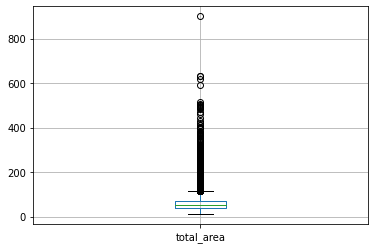

In [52]:
df.boxplot('total_area')

<AxesSubplot:>

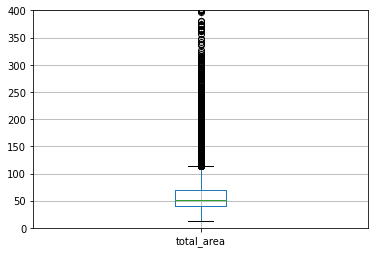

In [53]:
plt.ylim(0, 400)
df.boxplot('total_area')

In [54]:
#посмотрим, сколько квартир с площадью более 200 кв.м.
df.loc[df['total_area']>200,'total_area'].count()

226

<AxesSubplot:>

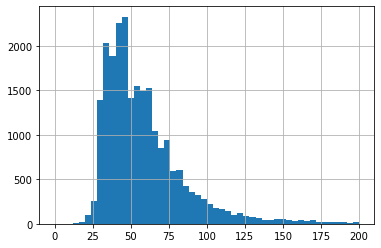

In [55]:
#построим гистограмму для объектов с общей плащадью менее 200 кв.м.
df['total_area'].hist(bins=50, range=(0,200))                                

In [56]:
big_area = df.query('total_area>200')
big_area.pivot_table(index=['rooms','locality_name'], values=['total_area','living_area'],aggfunc=['mean', 'count']).sort_values(by='rooms')

mean                   count           
                        living_area  total_area living_area total_area
rooms locality_name                                                   
0     Санкт-Петербург    254.308255  371.000000           1          1
1     Санкт-Петербург    240.180798  494.100000           1          1
3     Пушкин             130.000000  230.100000           1          1
      Санкт-Петербург    136.163352  256.947143          14         14
4     Красное Село        55.000000  215.000000           1          1
      Пушкин             119.300000  219.500000           2          2
      Санкт-Петербург    153.497027  260.711875          32         32
      Сертолово           78.000000  236.000000           1          1
      Сестрорецк         159.200000  214.000000           1          1
      поселок Стрельна   122.000000  209.600000           2          2
5     Санкт-Петербург    159.525486  276.383333          60         60
      деревня Хязельки   147.516655  230.000000           1          1
6     Санкт-Петербург    170.142092  268.967073          41         41
      Пушкин             198.000000  380.000000           1          1
      Красное Село       190.000000  320.000000           1          1
7     Пушкин             239.400000  374.000000           1          1
      Санкт-Петербург    203.267758  321.856757          37         37
      поселок Парголово  132.583158  201.500000           1          1
8     Колпино            160.000000  347.500000           1          1
      Санкт-Петербург    182.377778  269.122222           9          9
9     Санкт-Петербург    184.461289  305.975000           8          8
10    Санкт-Петербург    165.566667  259.566667           3          3
12    Санкт-Петербург    409.700000  900.000000           1          1
14    Санкт-Петербург    195.150000  304.200000           2          2
15    Санкт-Петербург    409.000000  590.000000           1          1
16    Санкт-Петербург    180.000000  270.000000           1          1
19    Санкт-Петербург    264.500000  374.600000           1          1

Большая часть объектов имеет общую площадь менее 70 кв. метров. Наибольшей популярностью обладают квартиры от 25 до 50 кв.м.
226 объектов имеют общую площадь более 200 кв.м. Основная чатсь из них имеет более 4 комнат и находятся в Санкт-Петербурге. Эти данные составляют всего 1% от общего количества объявлений,  и не повлияют на результат исследования. Мы не будем использовать их для анализа.

In [57]:
#отфильтурем квартиры с выбивающимися значениями по общей площади
data = df.query('total_area<=200')

In [58]:
#Проверим, что жилая площадь+площадь кухни не превышают общую площадь
data.loc[((data['living_area']+data['kitchen_area'])>data['total_area']), ['living_area', 'kitchen_area','total_area']]        

,living_area,kitchen_area,total_area
184,26.10,6.200000,30.20
424,88.00,13.802480,98.00
545,20.00,5.000000,23.80
551,30.55,9.280000,31.59
601,48.30,7.000000,53.70
...,...,...,...
21956,44.00,8.000000,46.00
22007,21.30,7.071193,28.30
22095,33.20,9.120090,36.50
23191,16.00,4.722457,18.90


In [59]:
#удалим строки с некорректными данными
rows_to_delate=data.loc[((data['living_area']+data['kitchen_area'])>data['total_area'])]
data=data.drop(index=rows_to_delate.index)
data.loc[(data['living_area']+data['kitchen_area'])>data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year,floor_type


Мы удалили 129 строк, в которых жилая площадь+площадь кухни превышали в сумме общую площадь квартиры. Такие данные некорректны.

In [60]:
#проанализируем данные по жилой площади квартир
data['living_area'].describe()

count    23200.000000
mean        33.333933
std         17.539843
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Минимальное значение 2 кв.м. является подозрительным. Норма жилой площади не менее 6 кв.м. 
Наличие больших площадей соотвествует оставленным объявлениям с общей площадью до 200 кв.м.

<AxesSubplot:>

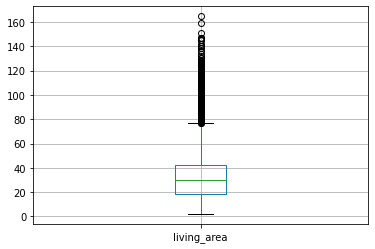

In [61]:
data.boxplot('living_area')

In [62]:
data.loc[data['living_area']<6, ['living_area','kitchen_area', 'total_area','rooms']]

,living_area,kitchen_area,total_area,rooms
3242,3.0,11.0,41.0,1
13915,2.0,9.0,52.0,2
17582,5.0,0.0,22.0,0
21758,2.0,0.0,23.0,0
21943,5.4,9.8,77.6,4
23574,3.0,16.0,139.0,3


In [63]:
#удалим строки с аномально низкой жилой площадью
data = data.query('living_area >=6')

<AxesSubplot:>

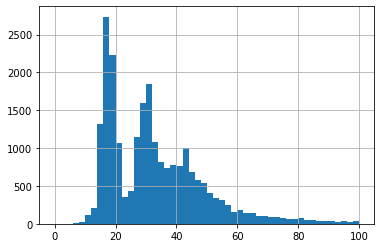

In [64]:
data['living_area'].hist(bins=50, range=(0,100))

3/4 объектов имеют жилую площать менее 42 кв.м.. Медианное значение соответствует 30 кв.м. На гистограмме четко видны два пика значений, которые приходятся на квартиры с жилой площадью около 18 кв.м. и 30 кв.м.  

In [65]:
#проанализируем данные по площади кухни квартир
data['kitchen_area'].describe()

count    23194.000000
mean        10.250952
std          5.211620
min          0.000000
25%          7.000000
50%          9.000000
75%         11.662905
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

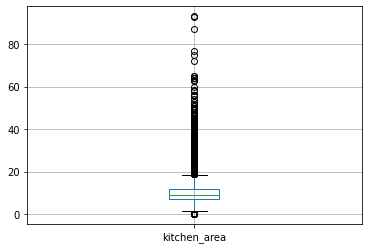

In [66]:
data.boxplot('kitchen_area')

<AxesSubplot:>

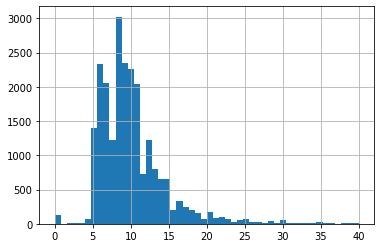

In [67]:
data['kitchen_area'].hist(bins=50, range=(0,40))

In [68]:
data.loc[data['kitchen_area']<4,['kitchen_area','living_area','total_area','rooms']].sort_values(by='total_area')

,kitchen_area,living_area,total_area,rooms
17961,3.248251,6.319268,13.0,1
19546,3.248251,6.319268,13.0,1
19558,3.298224,6.416488,13.2,1
19642,2.000000,11.000000,14.0,1
12040,3.747982,7.291463,15.0,1
...,...,...,...,...
12370,3.500000,32.600000,59.2,2
7950,2.890000,44.400000,66.4,2
21227,0.000000,68.000000,71.0,0
3458,0.000000,50.000000,73.6,0


In [69]:
data.loc[data['kitchen_area']>60,['kitchen_area','living_area','total_area','rooms']].sort_values(by='kitchen_area')

,kitchen_area,living_area,total_area,rooms
14900,62.5,42.7,125.6,2
19130,63.0,45.2,153.0,3
15780,64.0,36.4,119.6,3
17912,64.0,52.0,166.0,3
19499,64.0,36.0,118.0,3
18447,65.0,120.0,187.0,5
22980,65.0,72.0,155.4,3
16647,72.0,36.0,145.0,3
14644,75.0,58.0,150.0,4
4394,77.0,95.0,174.0,3


Основная часть квартир имеет площадь кухни от 6 до 11 кв.м. Значение 0 соответствует квартирам-студиям.
Значения площади кухни менее 4 или более 25 встречаются редко и соответствуют площади квартир.

In [70]:
#проанализируем данные о количестве комнат
data['rooms'].describe()

count    23194.000000
mean         2.037984
std          0.994954
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [71]:
data.loc[data['rooms']==0,'rooms'].count()

180

In [72]:
data.pivot_table(index='rooms', values=['studio','is_apartment','open_plan'], aggfunc='sum')

,is_apartment,open_plan,studio
rooms,,,
0,0,47,133
1,18,2,9
2,12,1,0
3,12,2,0
4,1,1,0
5,0,1,0
6,0,0,0
7,1,0,0
8,0,0,0


В данных присутствует 180 объявлений с количеством комнат равным 0. Из них 133 квартир являются студиями, 47 - квартиры со свободной планировкой.

Мы уже отсекли часть данных с большой площадью, что соответствовало большому количеству комнат. Проверим, соответствует ли большое количество комнат в оставшихся данных большой площади квартиры.

In [73]:
data.query('rooms>5').pivot_table(index='rooms', values='total_area', aggfunc=['mean','count'])

,mean,count
,total_area,total_area
rooms,,
6,153.951667,60
7,158.500000,20
8,170.600000,2
11,188.900000,2


<AxesSubplot:>

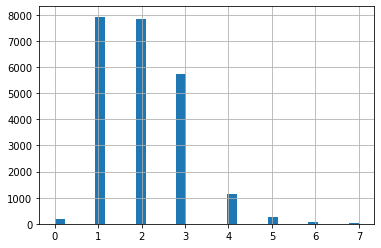

In [74]:
data['rooms'].hist(bins=30, range=(0,7))

Основная часть объявлений относится к 1, 2 и 3 комнатным квартирам.

In [75]:
data['ceiling_height'].describe()

count    23194.000000
mean         2.692312
std          0.210358
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

In [76]:
data.loc[data['ceiling_height']>4.5,['ceiling_height','total_area']]

,ceiling_height,total_area
1053,5.0,29.0
2802,4.8,50.0
7578,5.5,143.0
12628,5.3,50.0
19142,4.7,87.7
20264,6.0,187.6
21227,5.8,71.0


<AxesSubplot:>

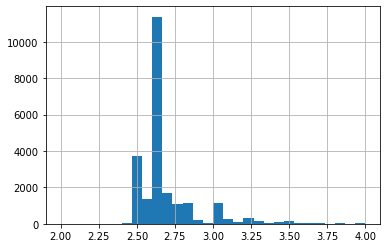

In [77]:
data['ceiling_height'].hist(bins=30, range=(2,4))

75% объектов имеет потолок от 2,2 до 2,7 м. При этом 50% квартир находится в диапазоне 2,6-2,7 м. 
Объекты с высокими потолками скорее всего относятся к загородной недвижимости или пентхаусам.

<AxesSubplot:ylabel='floor_type'>

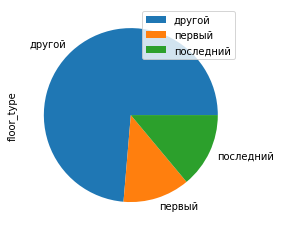

In [78]:
data.groupby('floor_type').count().plot(kind='pie', y='floor', label='floor_type')

Первые и посление этажи встречаются в 14% объявлений каждый. Основная часть объявлений приходится на другие этажи.

In [79]:
data['floors_total'].describe()

count    23194.000000
mean        10.701086
std          6.592704
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [80]:
#проверим, нет ли в данных объектов, где количество этажей указано меньше, чем этаж квартиры
data.loc[data['floors_total']<data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year,floor_type


<AxesSubplot:>

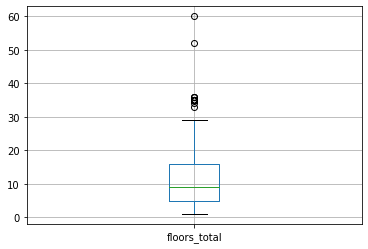

In [81]:
data.boxplot('floors_total')

<AxesSubplot:>

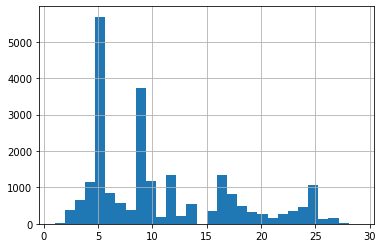

In [82]:
data.loc[data['floors_total']<=30,'floors_total'].hist(bins=30)

Основная часть квартир продается в зданиях не выше 17 этажей. Больше всего квартир продается в пятиэтажках, и в домах с 9 этажами. Наблюдаются единичные случаи продажи квартир в зданиях от 30 до 60 этажей.

In [83]:
data['cityCenters_nearest'].describe()

count    17809.000000
mean        14.285305
std          8.613655
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

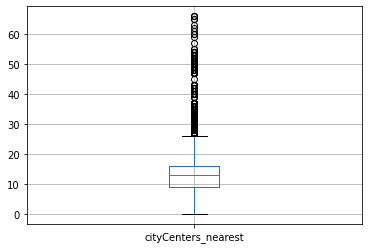

In [84]:
data.boxplot('cityCenters_nearest')

<AxesSubplot:>

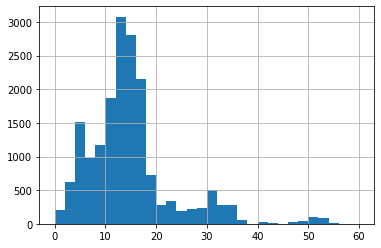

In [85]:
data['cityCenters_nearest'].hist(bins=30, range=(0,60))

75% объектов, где указано расстояние находятся в пределах 16 км от центра. Пик приходится на значения от 14 до 18 км. Объявлений с удаленностью объекта более 40 км - около 1,6%. Максимальное расстояние - 66 км. 

In [86]:
data.loc[data['cityCenters_nearest']>40,'cityCenters_nearest'].count()

294

In [87]:
data['parks_nearest'].describe()

count    7837.000000
mean      491.496236
std       341.147846
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

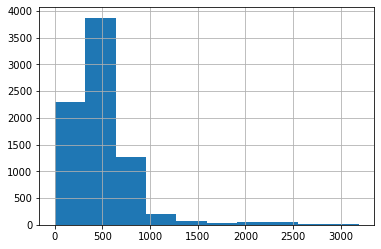

In [88]:
data['parks_nearest'].hist()

Данные по расстоянию до ближайшего парка загружаются в систему автоматически. Мы уже выяснили, что геоданные подгружаются не по всем населенным пунктам. Пропуски также связаны и с тем, что парков по близости просто нет. Среди имеющихся данных (34% от общего количества объявлений) большая часть объектов находится на расстоянии менее 613 метров от парка. Наибольшее указанное расстояние - 3,19 км.  

In [89]:
data['last_price'].describe()

count    2.319400e+04
mean     6.024812e+06
std      6.239352e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Минимальное значение стоимости квартиры указано 12190 руб. Скорее всего есть квартиры, стоимость которых указана в тыс. руб. Необходимо проверить, что у всех квартир одинаковая размерность.
75% объектов имеют стоимость не выше 6,7 млн. руб. Однако есть объекты со стоимостью 330 млн.

In [90]:
#Посмотрим, сколько квартир стоят меньше 100 тыс.
data.loc[data['last_price']<100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year,floor_type
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,NaN,8.0,0.293578,0.37156,111.83,2,3,2019,последний


In [91]:
#приведем стоимость в рубли, умножив указанное значение на 1000
data.loc[data['last_price']<100000,'last_price'] = data.loc[data['last_price']<100000,'last_price']*1000

In [92]:
#выразим стоимость квартиры в миллионах рублей
data['last_price'] = data['last_price']/1000000

<AxesSubplot:>

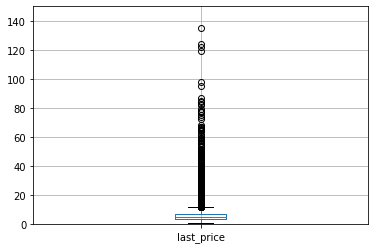

In [93]:
plt.ylim(0, 150)
data.boxplot('last_price')

In [94]:
data.loc[data['last_price']>60,'last_price'].value_counts().sum()

32

<AxesSubplot:ylabel='Frequency'>

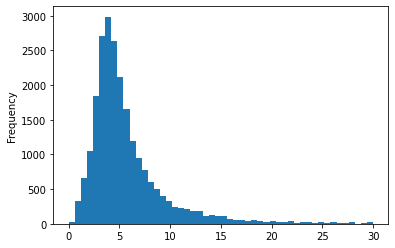

In [95]:
data['last_price'].plot(kind='hist',bins=50, range=(0,30))

In [96]:
data['last_price'].describe()

count    23194.000000
mean         6.025337
std          6.239358
min          0.430000
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

75% представленных объектов имеют стомиость до 6,7 млн.руб., 50% - оцениваются ниже 4,6 млн. руб.
32 объект обладает стоимостью более 60 млн. руб. Максимальная стоимость - 330 млн. руб.

Посмотрим, как быстропродавались квартиры.

In [97]:
data['days_exposition'].describe()

count    20090.000000
mean       179.761324
std        218.556513
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [98]:
data['days_exposition'].isna().sum()

3104

In [99]:
data.loc[data['days_exposition']>730,'days_exposition'].count()

725

<AxesSubplot:>

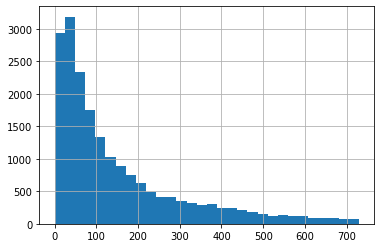

In [100]:
data['days_exposition'].hist(bins=30,range=(0,730))

Четверть объявлений была снята с публикации в течении 45 дней. Половина объявлений снимается с размещения в первые 3 месяца, а 3/4 снимаются в течении 8 месяцев. В данных присутствуют объявления со сроком размещения 1-4 дня, а так же объявления, срок размещения которых превышает 2 летний порог (3,6%). Также есть пустые 3104 значения (скорее всего не сняты с публикации на момент выгрузки данных).

<AxesSubplot:>

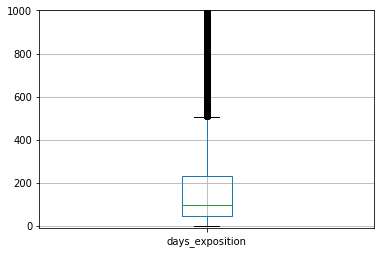

In [101]:
plt.ylim(-10, 1000)
data.boxplot('days_exposition')

In [102]:
data.loc[data['days_exposition']<=4,'days_exposition'].count()

332

In [103]:
#посмотрим какие квартиры продавались быстрее всего
(
    data.query('days_exposition<=90')
    .pivot_table(index=['locality_name','rooms'], values='total_area', aggfunc=['mean','count'])
    .sort_values(by=('count','total_area'),ascending=False).head(10)
)

mean      count
                        total_area total_area
locality_name     rooms                      
Санкт-Петербург   1      37.626696       2388
                  2      54.736571       2193
                  3      75.368921       1400
                  4      91.224034        233
поселок Мурино    1      35.308958        192
деревня Кудрово   1      36.029394        132
поселок Парголово 1      39.265824         91
поселок Шушары    1      39.505889         90
деревня Кудрово   2      58.703662         71
поселок Шушары    2      56.655652         69

Больше всего продавались однокомнатные и двухкомнатные квартиры в Санкт-Петербурге, средней площадью 37 и 54 кв. м. соответственно.

#### Анализ влияния различных факторов на общую стоимость объекта

##### Зависимость от общей площади, жилой площади, площади кухни

0.6596558154787238

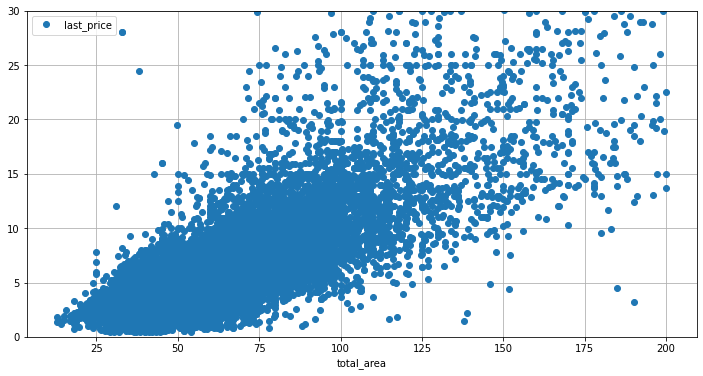

In [104]:
data.plot(x='total_area', y='last_price',style='o',ylim=(0,30), grid=True, figsize=(12,6))
data['last_price'].corr(data['total_area'])

0.5586209018481546

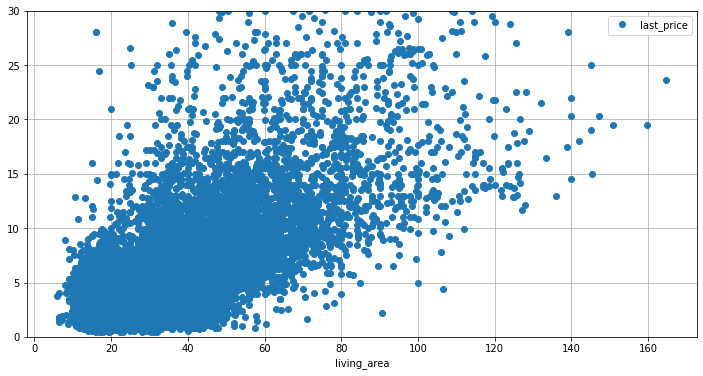

In [105]:
data.plot(x='living_area', y='last_price',style='o',ylim=(0,30), grid=True, figsize=(12,6))
data['last_price'].corr(data['living_area'])

0.5269638095666986

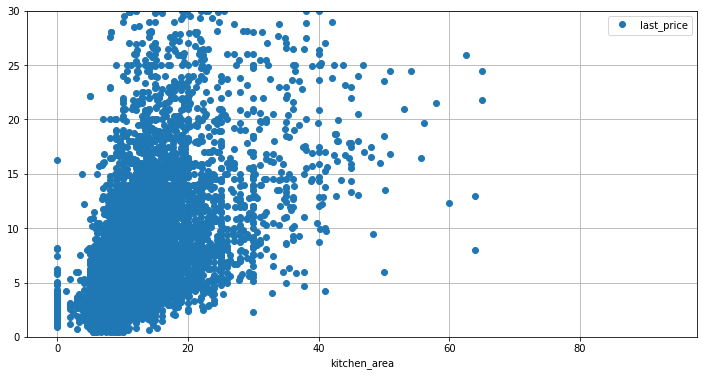

In [106]:
data.plot(x='kitchen_area', y='last_price',style='o',ylim=(0,30), grid=True, figsize=(12,6))
data['last_price'].corr(data['kitchen_area'])

Коэффициент корреляции цены от общей площади квартиры равен 0,68, что говорит о наличии прямой зависимости стоимости объекта от его общей площади. Корреляция между стоимостью квартиры, жилой площадью и площадью кухни составила соответственно 0,60 и 0,53, что так же говорит о наличии прямой зависимости, однако эти показатели влияют меньше, нежели общая площадь.

##### Влияние количества комнат на стоимость объекта

<AxesSubplot:xlabel='rooms'>

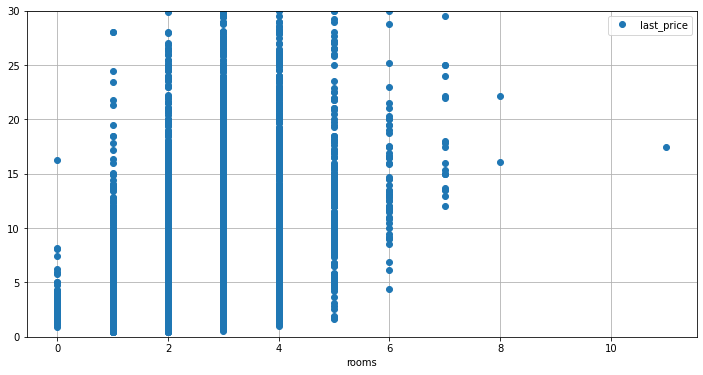

In [107]:
data.plot(x='rooms', y='last_price',style='o',ylim=(0,30), grid=True, figsize=(12,6))

<AxesSubplot:xlabel='rooms'>

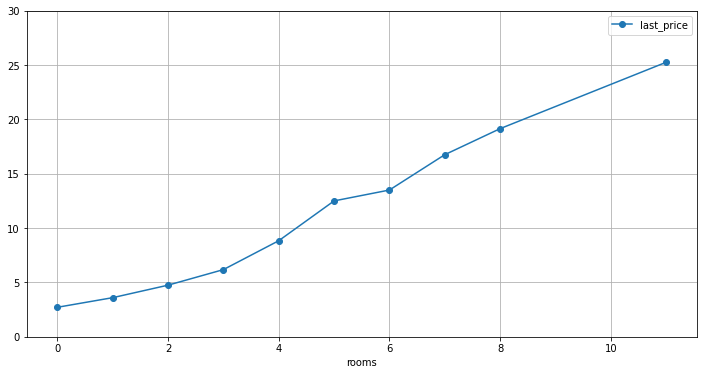

In [108]:
data.query('last_price<60').pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-',ylim=(0,30), grid=True, figsize=(12,6))


In [109]:
data['last_price'].corr(data['rooms'])

0.3799364629283344

In [110]:
data['rooms'].corr(data['total_area'])

0.7868915856741227

Стоимость квартиры в среднем растет при увеличении количества комнат. Однако, коэффициент корреляции достаточно низкий, чтобы утверждать о прямой зависимости общей стоимости от количества комнат. Видимая на графике зависимость скорее определяется площадью квартиры, которая растет с увеличением количества комнат (Коэффициент корреляции между количеством комнат и площадью квартиры составил 0,79).

##### Влияние этажа на стоимость объекта

Для оценнки влияние этажа на стоимость квартиры необходимо сравнивать квартиры с более менее одинаковыми параметрами по локации, площади. Для получения выборки возьмем данные, лежащие во 2 и 3 квартилях в столбцах со значениями общей площади и общей этажности дома. Так мы получим самый "популярный" срез данных. С целью исключить влияние локации объекта, отфильтруем данные по г. Санкт-Петербург, т.к. большая часть объявлений приходится на этот город.

<AxesSubplot:xlabel='floors_total'>

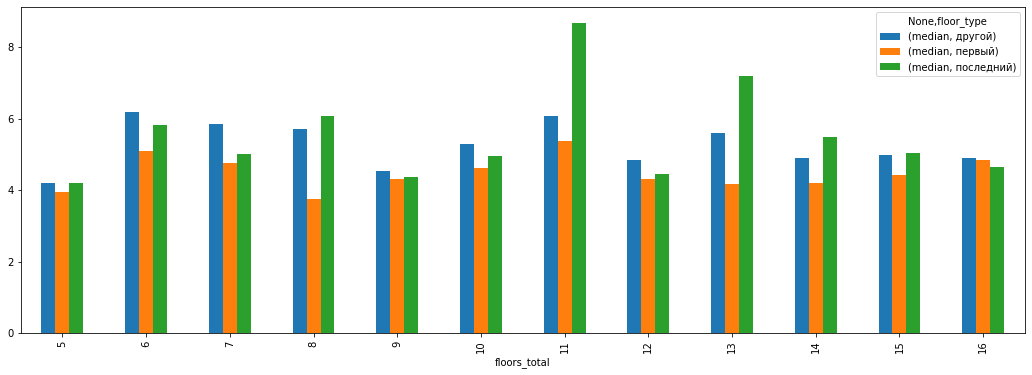

In [111]:
(
data.query('locality_name=="Санкт-Петербург"')
.query('total_area < 70 and 5<=floors_total<=16')
.pivot_table(index=['floors_total'], columns=['floor_type'], values='last_price', aggfunc=['median'])
.plot(kind='bar', figsize=(18,6)))

В среднем стомость квартиры на первом и последнем этажах ниже стоимости остальных этажей. Однако по мере увеличения этажности встречаются случаи увеличения стоимости последнего этажа. 

##### Влияние дня недели, месяца и года публикации объявления

<AxesSubplot:xlabel='year'>

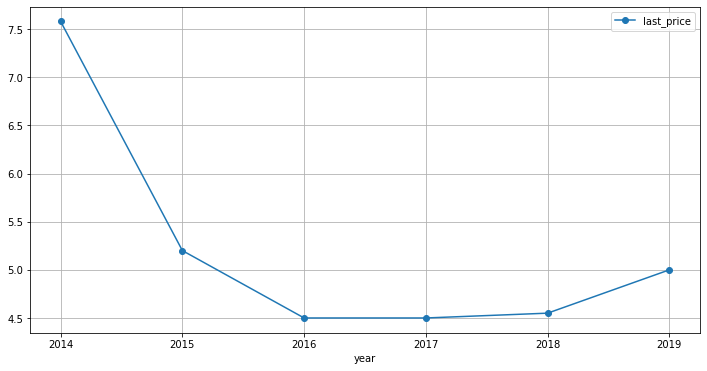

In [113]:
(
data.query('last_price<60')
.pivot_table(index='year', values='last_price', aggfunc='median')
.plot(style='o-',grid=True, figsize=(12,6))
)

<s>Коэффициент корреляции между стоимостью квартиры близок к нулю и говорит об отсутствии прямой зависимости стоимости квартиры от года размещения объявления.</s>

На графике наблюдается снижение средней стоимости недвижимости в 2015-2016 гг., сменяющееся ростом в следующих периодах. 
Возможно в эти годы на рынок недвижимости оказывали влияние экономические, политические и т.д. факторы. 

In [114]:
data.query('last_price<60').pivot_table(index=['year','month'], values='last_price', aggfunc=['median','count'])

median      count
           last_price last_price
year month                      
2014 11     14.000000         19
     12      7.182500        110
2015 1       6.329970         59
     2       5.300000         59
     3       5.575838        106
     4       5.230000         49
     5       5.100000         65
     6       4.750000         88
     7       5.100000         89
     8       5.450000         86
     9       6.210726         88
     10      5.009000        141
     11      5.100000        149
     12      4.790000        147
2016 1       4.885000        116
     2       4.550000        250
     3       4.550000        337
     4       4.525000        406
     5       4.300000        414
     6       4.500000        447
     7       4.375000        138
     8       4.070000         88
     9       4.800000        117
     10      5.000000        121
     11      4.445000        132
     12      4.600000        121
2017 1       4.577500        286
     2       4.660000        426
     3       4.500000        219
     4       4.580000        621
     5       4.500000        542
     6       4.200000        662
     7       4.400000        568
     8       4.500000        729
     9       4.600000        969
     10      4.300000        914
     11      4.500000       1213
     12      4.390000        870
2018 1       4.300000        586
     2       4.350000       1313
     3       4.220000       1008
     4       4.500000        301
     5       4.600000        149
     6       4.399500        522
     7       4.690000        852
     8       4.600000        815
     9       4.600000        761
     10      4.690000        897
     11      4.800000        814
     12      5.100000        357
2019 1       4.950000        415
     2       5.200000        550
     3       5.000000        862
     4       5.000000        939
     5       5.175000         60

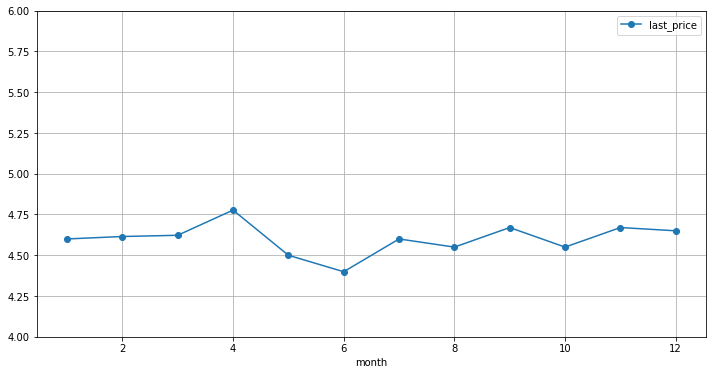

In [125]:
(
    data
    .query('last_price<60')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(style='o-',ylim=(4,6), grid=True, figsize=(12,6))
);

На графике наблюдаются незначительные колебания цен. Чтобы понять, влияет месяц на стоимость жилья необходимо сравнить динамику изменения цен по годам.

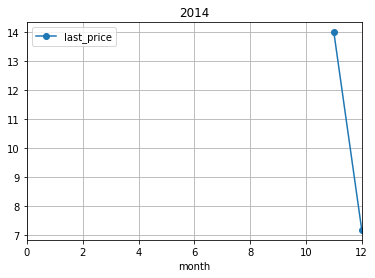

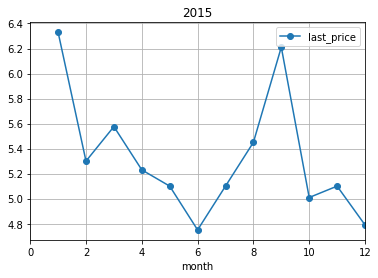

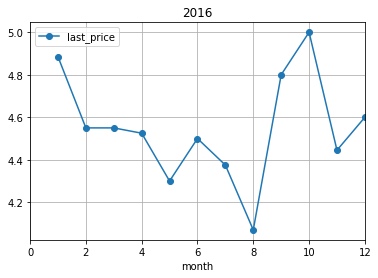

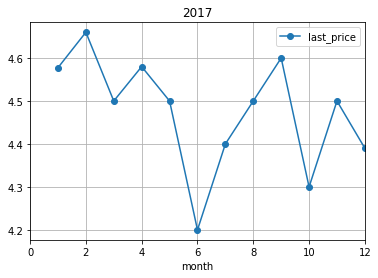

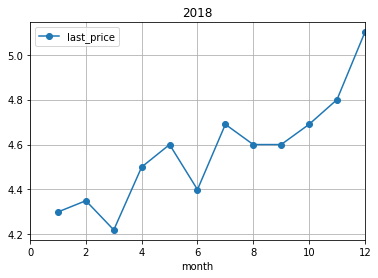

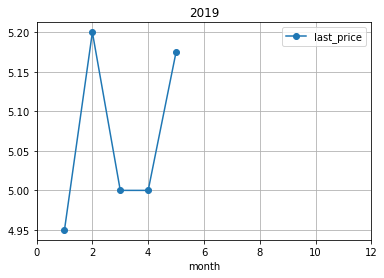

In [116]:
for num in data['year'].sort_values().unique():
    (
    data.loc[(data['year']==num)&(data['last_price']<60)]
    .pivot_table(index='month', values='last_price', aggfunc='median').plot(style='o-', xlim=(0,12), grid=True, title=num, figsize=(6,4))
    )
    plt.show()

Говорить о четком снижении или повышении стоимости в определенном месяце не приходится. Делаем вывод, что месяц не оказывает значимого влияния на стоимость недвижимости.

<AxesSubplot:xlabel='weekday'>

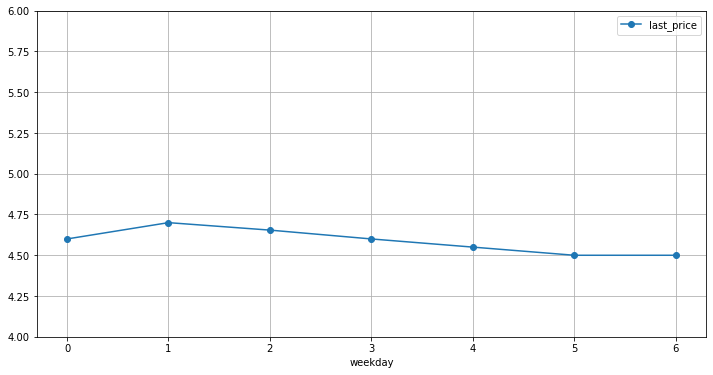

In [117]:
data.query('last_price<60').pivot_table(index='weekday', values='last_price', aggfunc='median').plot(style='o-',ylim=(4,6), grid=True, figsize=(12,6))
#data['last_price'].corr(data['weekday'])

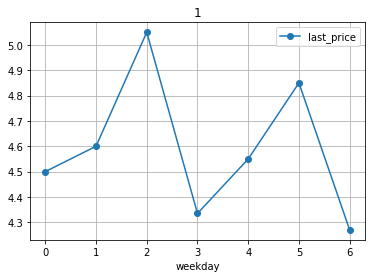

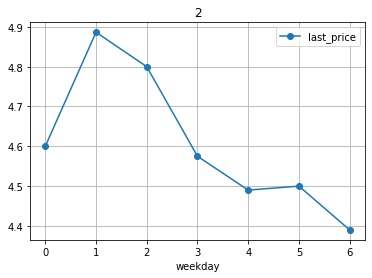

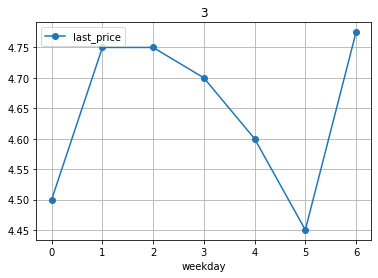

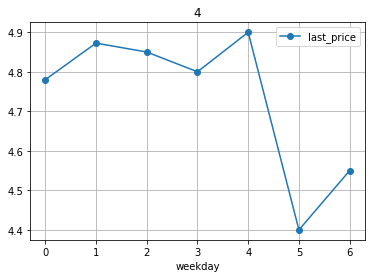

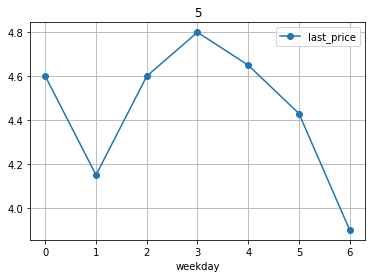

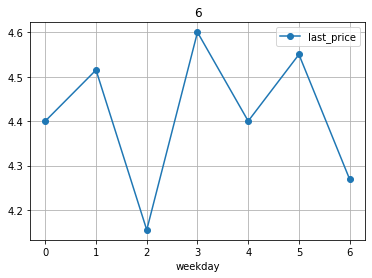

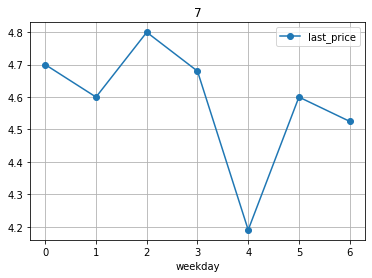

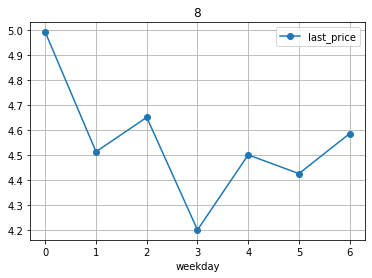

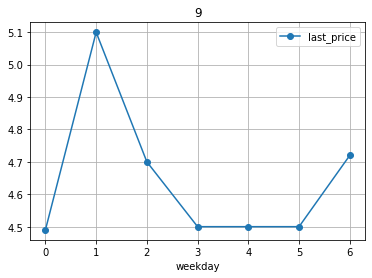

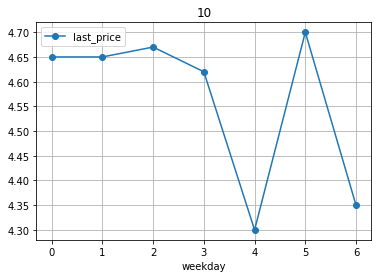

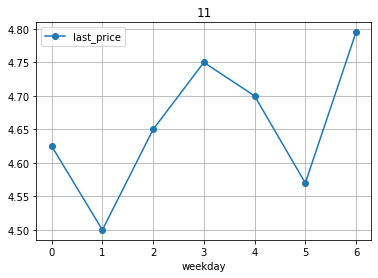

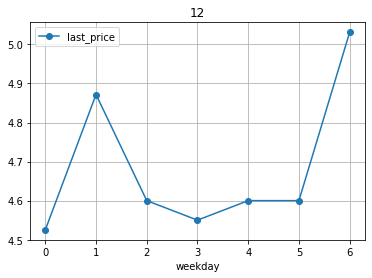

In [118]:
for num in data['month'].sort_values().unique():
    (
    data.loc[(data['month']==num)&(data['last_price']<60)]
    .pivot_table(index='weekday', values='last_price', aggfunc='median').plot(style='o-', grid=True, title=num)
    )
    plt.show()

Зависимости от дня недели размещения объявления не прослеживается

#### Анализ стоимости квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений и найдем населенные пункты с самой высокой и самой низкой стоимостью метра.

In [119]:
#сохраним в перемнную locality_top 10 населенных пунктов с наибольшим количеством объявлений
locality_top = data['locality_name'].value_counts().head(10).index
data_top = (data.query('locality_name in @locality_top')
            .pivot_table(index='locality_name', values='price_per_metr', aggfunc=['median','count']))
data_top.sort_values(by=('median','price_per_metr'), ascending=False)

,median,count
,price_per_metr,price_per_metr
locality_name,,
Санкт-Петербург,104545.450,15347
Пушкин,99987.180,363
деревня Кудрово,95555.315,466
поселок Парголово,91642.860,325
поселок Мурино,86059.295,572
поселок Шушары,76666.670,437
Колпино,74723.745,336
Гатчина,67647.060,303


Самая высокая стомиость квадратного метра в Санкт-Петербрге. Самая низкая - в Выборге.

Вычислим среднюю стоимость каждого километра в Санкт-Петербурге.

In [120]:
Spb_data = (data.query('locality_name=="Санкт-Петербург"')
            .pivot_table(index='cityCenters_nearest', values='price_per_metr',aggfunc=['median','count']))
Spb_data['temp'] = (Spb_data['median','price_per_metr']. pct_change ()*100).round()
Spb_data

,median,count,temp
,price_per_metr,price_per_metr,
cityCenters_nearest,,,
0.0,150243.965,24,NaN
1.0,126036.775,174,-16.0
2.0,121134.020,283,-4.0
3.0,108139.530,339,-11.0
4.0,117692.310,663,9.0
5.0,126863.515,858,8.0
6.0,129915.400,575,2.0
7.0,126063.830,407,-3.0


<AxesSubplot:xlabel='cityCenters_nearest'>

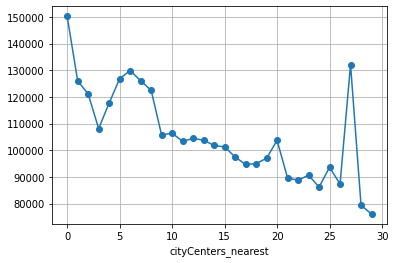

In [121]:
Spb_data['median','price_per_metr'].plot(style='o-',grid=True)

In [122]:
#посмотрим, что за пик цен на расстоянии 27 км
data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,price_per_metr,weekday,month,year,floor_type
748,13,14.35,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128.0,0.405405,0.337838,193918.92,1,11,2017,другой
5961,6,2.25,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0,NaN,178.0,0.515625,0.218750,70312.50,1,2,2018,последний


На данном удалении от центра есть только 2 объявления, одно из которых имеет достаточно высокую стоимость метра, что и дает такой рост. 

In [123]:
Spb_data.describe()

,median,count,temp
,price_per_metr,price_per_metr,
count,30.000000,30.000000,29.000000
mean,105567.359000,511.566667,-1.517241
std,17469.122189,519.482281,13.832211
min,76084.735000,2.000000,-40.000000
25%,93874.167500,56.000000,-4.000000
50%,103513.107500,311.000000,-2.000000
75%,120273.592500,821.250000,2.000000
max,150243.965000,1643.000000,51.000000


Средняя стоимость квадратного метра в центре Санкт-Петербурга составляет 150 тыс. руб. По мере удаления от центра средняя стоимость квадратного метра в целом снижается. Однако наблюдается скачки прироста цен по отношению к предыдущему километру на расстоянии 4-6 км, 20 км, 25 и 27 км от Санкт-Петербурга.  

### Общий вывод

Полученные для проведения исследования информация содержала данные о продаже недвижимости в Санкт-Петербурге и Ленинградской области за период с ноября 2014 по май 2019 гг.<br>
Первичная обработка данных показал наличие большого числа пропусщенных значений в данных о площади квартир и картографических данных.<br>
В результате работы с пропущенными данными было обнаружено, что по некоторым населенным пунктам не выгружаются картографические данные. Список таких населенных пунктов сохранен в 'no_geolocation_info_list'.<br>
Проведена работа с аномальными, некорректными значениями и неявными дубликатами. В данных присутствуют объекты, где стоимость жилой площади и площади кухни превышают общую площадь квартиры. Такие данные не использовались для анализа.  <br>
Для анализа были использованы объекты с общей площадью менее 200 кв.м. и общей стоимостью не выше 60 млн. руб.<br>

В результате проведенного исследования сделаны следующие выводы:
1. 75% представленных объектов имеют стомиость до 6,7 млн.руб., 50% - оцениваются ниже 4,6 млн. руб. 32 объект обладает стоимостью более 60 млн. руб. Максимальная стоимость - 330 млн. руб.
2. Общая стоимость квартиры зависит как от ее общей площади, так и от площади кухни и жилой площади и растет при увеличении этих параметров. Однако, общая площадь оказывает большее влияние на стоимость, нежели площадь кухни и жилая площадь, что подтвержадается более высоким коэффициентом корреляции Пирсона.<br>
Большая часть объектов имеет общую площадь менее 70 кв. метров. Наибольшей популярностью обладают квартиры от 25 до 52 кв.м.<br>
Жилая площадь 3/4 объектов составляет менее 42 кв.м. На гистограмме четко видны два пика значений, которые приходятся на квартиры с жилой площадью около 18 кв.м. и 30 кв.м.<br>
Основная часть квартир имеет площадь кухни от 6 до 11 кв.м. <br>
3. Стоимость квартиры в среднем растет при увеличении количества комнат. Однако, коэффициент корреляции достаточно низкий, чтобы утверждать о прямой зависимости общей стоимости от количества комнат. Видимая на графике зависимость скорее определяется площадью квартиры, которая растет с увеличением количества комнат. Основная часть объявлений относится к 1, 2 и 3 комнатным квартирам.
4. Высота потолка в среднем составляет 2,65 м. Однако встречаются объявления с потолком от 4 до 10 м. 
5. Основная часть объектов расположена в зданиях не выше 17 этажей. Больше всего продается в пятиэтажках, и в домах с 9 этажами. Наблюдаются единичные случаи продажи квартир в зданиях от 30 до 60 этажей.<br>
Первые и последние этажи встречаются 14% объявлений каждый. Первые этажи в среднем продаются дешевле. Однако сложно говорить о прямой зависимости стоимости объекта от размещения объекта на последнем этаже. С увеличением этажности дома средняя стоимость последних этажей встречается выше остальных.
6. Скорость продажи квартир в 75% случаев ограничивается 8 месяцами. При этом четверть объявлений была снята с публикации в течении 45 дней, а половина квартир продалась в первые 3 месяца. В данных присутствуют объявления со сроком размещения менее 4 дней, а так же объявления, срок размещения которых превышает 2 летний порог (3,6%).<br>
Быстрее всего (менее 90 дней) продавались однокомнатные и двухкомнатные квартиры в Санкт-Петербурге, средней площадью 37 и 54 кв. м. соответственно.<br>
Стоимость не зависит от года, месяца и дня размещения объявления. 
7. Большая часnь объектов находИтся в пределах 16 км от центра. При этом 65% находится в Санкт-Петербурге.
8. Средняя стоимость одного квадратного метра выше всего в Санкт-Петербурге и составляет 150 тыс.руб., которая имеет тенденцию к снижению в среднем на 1,5% на 1 км по мере удаления от центра. Однако наблюдается скачки прироста цен по отношению к предыдущему километру на расстоянии 4-6 км, 20 км, 25 и 27 км от Санкт-Петербурга.



